In [1]:
# Importing Libraries
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math


In [2]:
# Set options to display all rows
pd.set_option('display.max_rows', None)

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the datasets
train_1 = pd.read_csv('../data/processed/train_data_processed_1.csv')

In [4]:
train_1.shape

(92067, 76)

In [5]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92067 entries, 0 to 92066
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   host_response_rate                        78617 non-null  float64
 1   host_listings_count                       92067 non-null  int64  
 2   host_total_listings_count                 91898 non-null  float64
 3   latitude                                  92067 non-null  float64
 4   longitude                                 92067 non-null  float64
 5   accommodates                              92017 non-null  float64
 6   bathrooms                                 91786 non-null  float64
 7   bedrooms                                  91954 non-null  float64
 8   beds                                      91976 non-null  float64
 9   price                                     91534 non-null  float64
 10  cleaning_fee                      

## Missing Value Handling

In [6]:
train_1.isna().sum()

host_response_rate                          13450
host_listings_count                             0
host_total_listings_count                     169
latitude                                        0
longitude                                       0
accommodates                                   50
bathrooms                                     281
bedrooms                                      113
beds                                           91
price                                         533
cleaning_fee                                20180
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
high_booking_rate                               0


In [7]:
features_with_missing_values = [f for f in train_1.columns if train_1[f].isna().any()]
features_with_missing_values

['host_response_rate',
 'host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'cleaning_fee',
 'days_since_host_joined',
 'host_response_time_encoded']

In [8]:
train_1[features_with_missing_values].describe()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,days_since_host_joined,host_response_time_encoded
count,78617.000000,91898.000000,92017.000000,91786.000000,91954.000000,91976.000000,91534.000000,71887.000000,91898.000000,78617.000000
mean,95.021420,7.091525,3.454286,1.274067,1.339474,1.845384,146.636922,66.942716,4011.849529,2.395233
std,14.071009,42.484994,2.322975,0.625823,0.911366,1.396918,121.085563,54.801368,631.539598,0.810058
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2880.000000,0.000000
25%,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,29.000000,3511.000000,2.000000
50%,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,110.000000,50.000000,3940.000000,3.000000
75%,100.000000,3.000000,4.000000,1.000000,2.000000,2.000000,175.000000,90.000000,4454.000000,3.000000
max,100.000000,1026.000000,18.000000,8.000000,10.000000,16.000000,999.000000,950.000000,6243.000000,3.000000


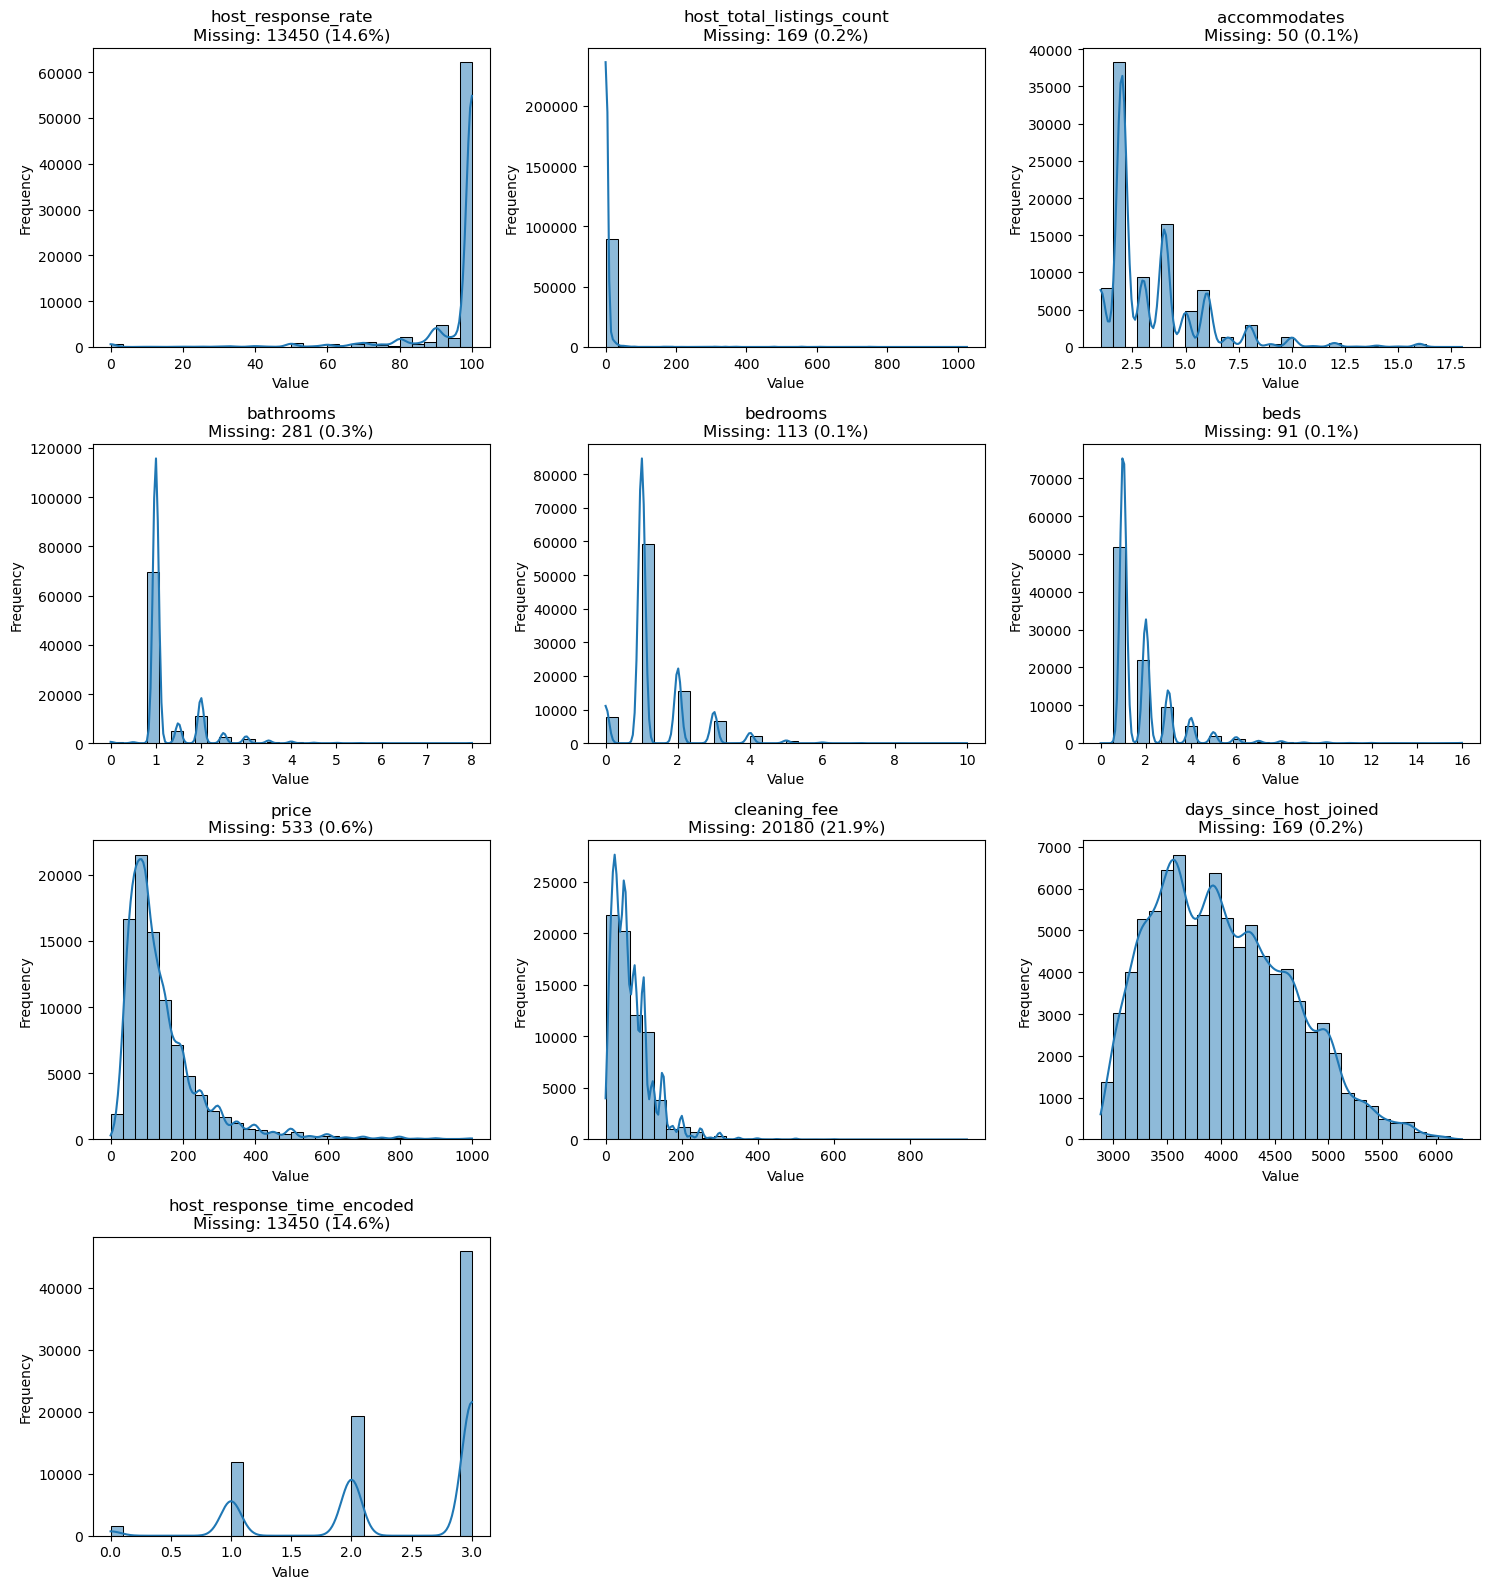

In [9]:
# Pre-compute missing value counts and percentages
missing_counts = train_1[features_with_missing_values].isna().sum()
missing_percent = (missing_counts / len(train_1)) * 100

# Setup subplot grid
num_features = len(features_with_missing_values)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each feature's histogram + KDE + missing info
for i, feature in enumerate(features_with_missing_values):
    sns.histplot(train_1[feature].dropna(), kde=True, bins=30, ax=axes[i], edgecolor='black')
    axes[i].set_title(f"{feature}\nMissing: {missing_counts[feature]} ({missing_percent[feature]:.1f}%)")
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
# 1. host_response_rate
mean_val = train_1['host_response_rate'].mean()
train_1['host_response_rate'].fillna(mean_val, inplace=True)

In [11]:
# 2. host_total_listings_count
# replacing with the most frequent value - 1
train_1['host_total_listings_count'].fillna(1, inplace=True)

In [12]:
# 3. accomodates

# This is kind of interesting as by common sense we know accommodates should have a pretty direct relation with features like beds, bedrooms, bathrooms and maybe even price
# so it might be a good idea to make an imputation model (rule based or ML ) which could give us a good estimate for the missing values
# however for now, we will go with the most frequent value i.e. 2
train_1['accommodates'].fillna(2, inplace=True)

In [13]:
# 4. bathrooms, bedrooms and beds 

# again we could build individual imputation models for these in the future but for now lets impute with mode
mode_bathrooms = train_1['bathrooms'].mode()[0]
train_1['bathrooms'].fillna(mode_bathrooms, inplace=True)

mode_bedrooms = train_1['bedrooms'].mode()[0]
train_1['bedrooms'].fillna(mode_bedrooms, inplace=True)

mode_beds = train_1['beds'].mode()[0]
train_1['beds'].fillna(mode_beds, inplace=True)

In [14]:
# price, cleaning_fee, days_since_host_joined

# since they are skewed, it will be wiser (on paper) to impute with median instead of mean at least for now

med_price = train_1['price'].median()
train_1['price'].fillna(med_price, inplace=True)

med_cf = train_1['cleaning_fee'].median()
train_1['cleaning_fee'].fillna(med_cf, inplace=True)

med_dshj = train_1['days_since_host_joined'].median()
train_1['days_since_host_joined'].fillna(med_dshj, inplace=True)


In [15]:
# host_response_time_encoded

# mode imputation right now
mode_hrte = train_1['host_response_time_encoded'].mode()[0]
train_1['host_response_time_encoded'].fillna(mode_hrte, inplace=True)

In [19]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92067 entries, 0 to 92066
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   host_response_rate                        92067 non-null  float64
 1   host_listings_count                       92067 non-null  int64  
 2   host_total_listings_count                 92067 non-null  float64
 3   latitude                                  92067 non-null  float64
 4   longitude                                 92067 non-null  float64
 5   accommodates                              92067 non-null  float64
 6   bathrooms                                 92067 non-null  float64
 7   bedrooms                                  92067 non-null  float64
 8   beds                                      92067 non-null  float64
 9   price                                     92067 non-null  float64
 10  cleaning_fee                      

In [16]:
train_2 = train_1.copy()

In [18]:
#  train_2.isna().sum()

## Feature Scaling

I am gonna skip this for now since I am predominantly going to fine tune tree based models. Might come back to this later for performance improvement

In [20]:
#output this data into a csv as train_data_proccessed_1
train_2.to_csv('../data/processed/train_exp_ready_no_feature_scaling.csv', index=False)